<a href="https://colab.research.google.com/github/mohamedfadil-rec/FOML/blob/main/FOML_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


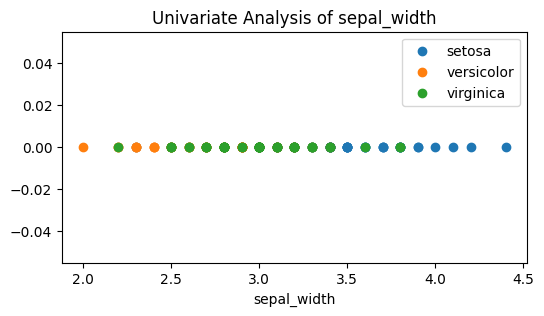

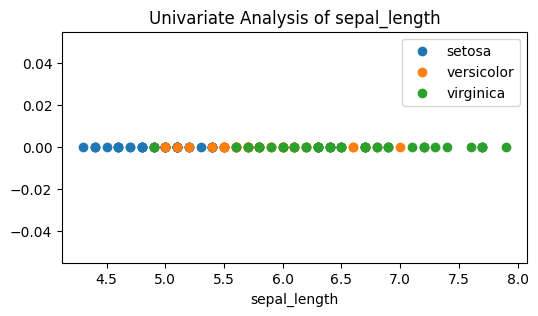

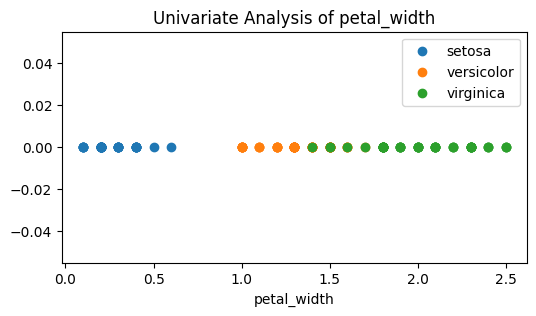

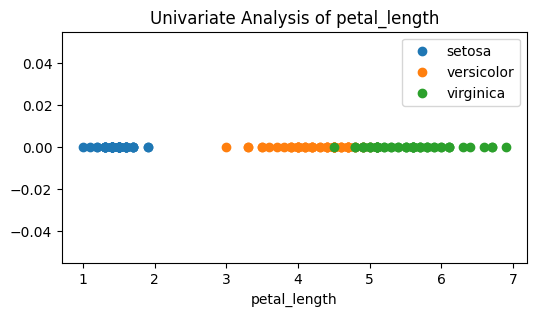

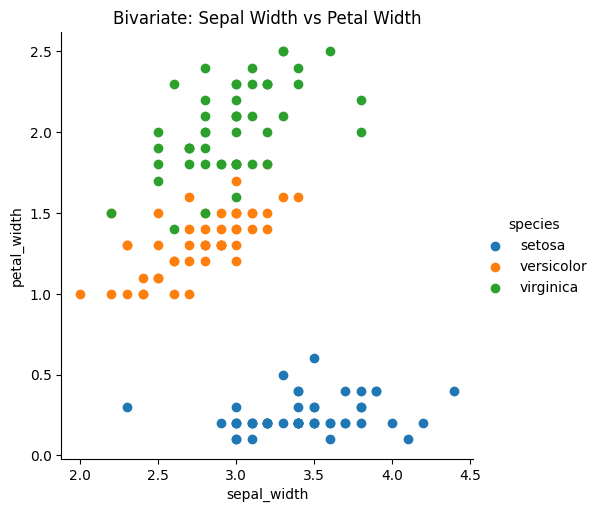

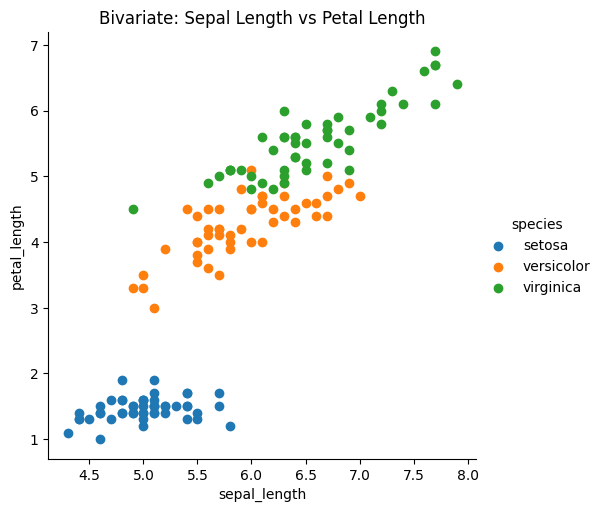

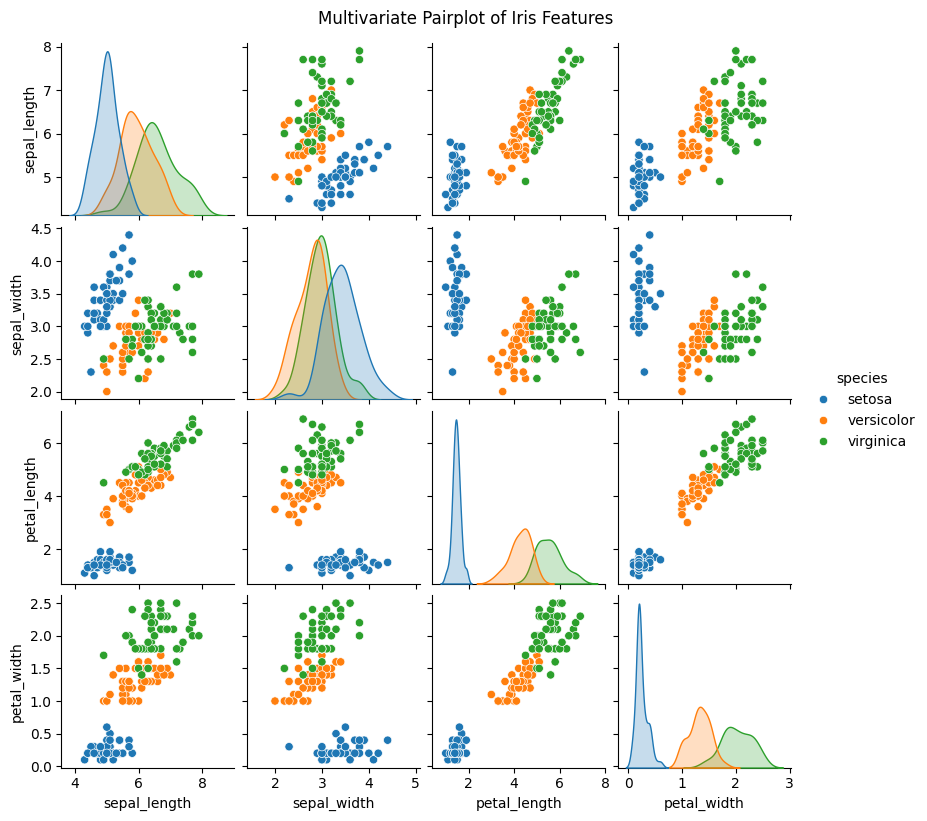

In [11]:
# 🌸 Univariate, Bivariate, and Multivariate Analysis on Iris Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
try:
    df = sns.load_dataset('iris')
    print(df.shape)
    print(df.head())

    # -----------------------------
    # 🌿 Univariate Analysis
    # -----------------------------
    species = df['species'].unique()

    # Function to plot univariate scatter
    def univariate_plot(feature):
        plt.figure(figsize=(6, 3))
        for sp in species:
            subset = df[df['species'] == sp]
            plt.scatter(subset[feature], np.zeros_like(subset[feature]), label=sp)
        plt.xlabel(feature)
        plt.legend()
        plt.title(f'Univariate Analysis of {feature}')
        plt.show()

    # Plot each feature
    for feature in ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']:
        univariate_plot(feature)


    # -----------------------------
    # 🌸 Bivariate Analysis
    # -----------------------------
    # sepal.width vs petal.width
    sns.FacetGrid(df, hue='species', height=5).map(plt.scatter, "sepal_width", "petal_width").add_legend()
    plt.title('Bivariate: Sepal Width vs Petal Width')
    plt.show()

    # sepal.length vs petal.length
    sns.FacetGrid(df, hue='species', height=5).map(plt.scatter, "sepal_length", "petal_length").add_legend()
    plt.title('Bivariate: Sepal Length vs Petal Length')
    plt.show()


    # -----------------------------
    # 🌺 Multivariate Analysis
    # -----------------------------
    sns.pairplot(df, hue="species", height=2)
    plt.suptitle('Multivariate Pairplot of Iris Features', y=1.02)
    plt.show()

except FileNotFoundError:
    print("Error: The file 'iris.csv' was not found. Please check the file path.")

=== Simple Linear Regression using Least Squares ===
Slope (b1): 0.60
Intercept (b0): 2.20


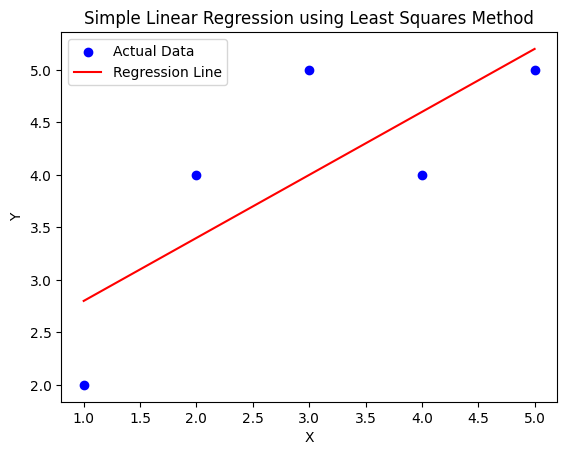

Predicted value of Y when X = 6 → 5.80


In [12]:
# 📘 Simple Linear Regression using Least Squares Method (from scratch)

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Input Data
# -----------------------------
# Example: Hours studied vs Marks obtained
x = np.array([1, 2, 3, 4, 5])   # Independent variable
y = np.array([2, 4, 5, 4, 5])   # Dependent variable

# -----------------------------
# Step 2: Calculate Mean
# -----------------------------
mean_x = np.mean(x)
mean_y = np.mean(y)

# -----------------------------
# Step 3: Calculate coefficients (slope and intercept)
# Formula:
# b1 = Σ(x - mean_x)*(y - mean_y) / Σ(x - mean_x)^2
# b0 = mean_y - b1*mean_x
# -----------------------------
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x)**2)
b1 = numerator / denominator
b0 = mean_y - b1 * mean_x

print("=== Simple Linear Regression using Least Squares ===")
print(f"Slope (b1): {b1:.2f}")
print(f"Intercept (b0): {b0:.2f}")

# -----------------------------
# Step 4: Predict values
# -----------------------------
y_pred = b0 + b1 * x

# -----------------------------
# Step 5: Plot the Regression Line
# -----------------------------
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression using Least Squares Method')
plt.legend()
plt.show()

# -----------------------------
# Step 6: Predict for a new value
# -----------------------------
x_new = 6
y_new = b0 + b1 * x_new
print(f"Predicted value of Y when X = {x_new} → {y_new:.2f}")


Dataset:
    Hours_Studied  Pass
0              1     0
1              2     0
2              3     0
3              4     0
4              5     1
5              6     1
6              7     1
7              8     1
8              9     1
9             10     1

Predicted Values: [0 1 1]
Predicted Probabilities: [0.13 0.99 0.54]

=== Model Evaluation ===
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


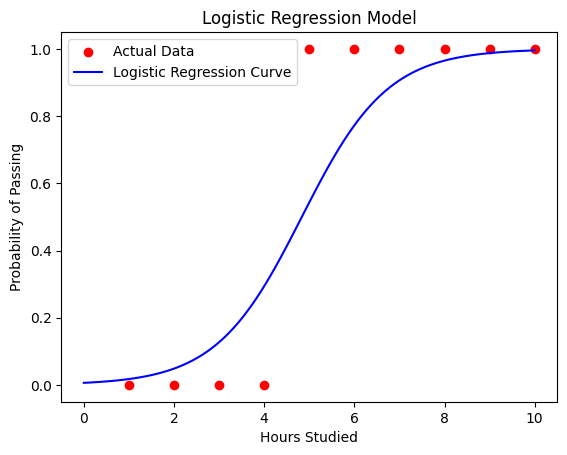


For 7 hours of study:
Predicted Probability of Passing: 0.91
Predicted Class (0=Fail, 1=Pass): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [13]:
# 📘 Logistic Regression Example in Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Step 1: Create or Load Data
# -----------------------------
# Example dataset: Hours studied vs Pass(1)/Fail(0)
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass':           [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

# -----------------------------
# Step 2: Split Data
# -----------------------------
x = df[['Hours_Studied']]   # Independent variable
y = df['Pass']              # Dependent variable (binary)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# -----------------------------
# Step 3: Train Logistic Model
# -----------------------------
model = LogisticRegression()
model.fit(x_train, y_train)

# -----------------------------
# Step 4: Make Predictions
# -----------------------------
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]   # Probability of class 1

print("\nPredicted Values:", y_pred)
print("Predicted Probabilities:", np.round(y_prob, 2))

# -----------------------------
# Step 5: Model Evaluation
# -----------------------------
print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Step 6: Visualize Logistic Curve
# -----------------------------
# Generate smooth values for plotting curve
x_values = np.linspace(0, 10, 100).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]

plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_values, y_values, color='blue', label='Logistic Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Model')
plt.legend()
plt.show()

# -----------------------------
# Step 7: Predict for a New Value
# -----------------------------
hours = 7
prob = model.predict_proba([[hours]])[0][1]
pred = model.predict([[hours]])[0]

print(f"\nFor {hours} hours of study:")
print(f"Predicted Probability of Passing: {prob:.2f}")
print(f"Predicted Class (0=Fail, 1=Pass): {pred}")


In [14]:
# 📘 Single Layer Perceptron Implementation (from scratch)

import numpy as np

# -----------------------------
# Step 1: Define input and output (OR logic)
# -----------------------------
# Inputs: 2 binary features
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output for OR gate
y = np.array([[0], [1], [1], [1]])

# -----------------------------
# Step 2: Initialize weights and bias
# -----------------------------
np.random.seed(42)
weights = np.random.rand(2, 1)   # 2 inputs → 1 output
bias = np.random.rand(1)
learning_rate = 0.1

# -----------------------------
# Step 3: Define activation (step) function
# -----------------------------
def activation(z):
    return np.where(z >= 0, 1, 0)

# -----------------------------
# Step 4: Train the Perceptron
# -----------------------------
epochs = 10
for epoch in range(epochs):
    for i in range(len(x)):
        # Weighted sum
        z = np.dot(x[i], weights) + bias
        # Activation output
        y_pred = activation(z)
        # Compute error
        error = y[i] - y_pred
        # Update weights and bias
        weights += learning_rate * error * x[i].reshape(2, 1)
        bias += learning_rate * error
    print(f"Epoch {epoch+1}: Weights = {weights.T}, Bias = {bias}")

# -----------------------------
# Step 5: Test the trained perceptron
# -----------------------------
print("\n=== Testing Trained Perceptron ===")
for i in range(len(x)):
    z = np.dot(x[i], weights) + bias
    y_pred = activation(z)
    print(f"Input: {x[i]} → Output: {int(y_pred)}")



Epoch 1: Weights = [[0.37454012 0.95071431]], Bias = [0.63199394]
Epoch 2: Weights = [[0.37454012 0.95071431]], Bias = [0.53199394]
Epoch 3: Weights = [[0.37454012 0.95071431]], Bias = [0.43199394]
Epoch 4: Weights = [[0.37454012 0.95071431]], Bias = [0.33199394]
Epoch 5: Weights = [[0.37454012 0.95071431]], Bias = [0.23199394]
Epoch 6: Weights = [[0.37454012 0.95071431]], Bias = [0.13199394]
Epoch 7: Weights = [[0.37454012 0.95071431]], Bias = [0.03199394]
Epoch 8: Weights = [[0.37454012 0.95071431]], Bias = [-0.06800606]
Epoch 9: Weights = [[0.37454012 0.95071431]], Bias = [-0.06800606]
Epoch 10: Weights = [[0.37454012 0.95071431]], Bias = [-0.06800606]

=== Testing Trained Perceptron ===
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


/tmp/ipython-input-2048329046.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Input: {x[i]} → Output: {int(y_pred)}")


In [15]:
# 📘 Multi Layer Perceptron (MLP) with Backpropagation
# Example: Learn XOR logic function

import numpy as np

# -----------------------------
# Step 1: Input and Output
# -----------------------------
# XOR input and expected output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# -----------------------------
# Step 2: Initialize Parameters
# -----------------------------
np.random.seed(42)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.5
epochs = 10000

# Random weight initialization
W1 = np.random.uniform(size=(input_neurons, hidden_neurons))
b1 = np.random.uniform(size=(1, hidden_neurons))
W2 = np.random.uniform(size=(hidden_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))

# -----------------------------
# Step 3: Activation Functions
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# -----------------------------
# Step 4: Training Loop (Forward + Backward Propagation)
# -----------------------------
for epoch in range(epochs):
    # ---- Forward pass ----
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # ---- Compute Error ----
    error = y - final_output

    # ---- Backpropagation ----
    d_final = error * sigmoid_derivative(final_output)
    d_hidden = d_final.dot(W2.T) * sigmoid_derivative(hidden_output)

    # ---- Update Weights ----
    W2 += hidden_output.T.dot(d_final) * learning_rate
    b2 += np.sum(d_final, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Optionally print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}: Loss = {loss:.5f}")

# -----------------------------
# Step 5: Final Output
# -----------------------------
print("\n=== Final Outputs After Training ===")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Output: {final_output[i][0]:.4f}")


Epoch 0: Loss = 0.32466
Epoch 1000: Loss = 0.01257
Epoch 2000: Loss = 0.00255
Epoch 3000: Loss = 0.00134
Epoch 4000: Loss = 0.00090
Epoch 5000: Loss = 0.00067
Epoch 6000: Loss = 0.00054
Epoch 7000: Loss = 0.00045
Epoch 8000: Loss = 0.00038
Epoch 9000: Loss = 0.00033

=== Final Outputs After Training ===
Input: [0 0] -> Output: 0.0189
Input: [0 1] -> Output: 0.9837
Input: [1 0] -> Output: 0.9837
Input: [1 1] -> Output: 0.0169


Dataset sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

=== Model Evaluation ===
Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00

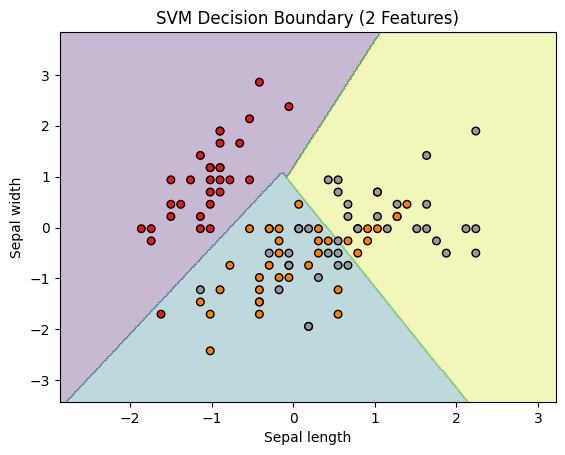

In [16]:
# 📘 Support Vector Machine (SVM) Classifier Example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("Dataset sample:")
print(df.head())

# -----------------------------
# Step 2: Split Data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Step 4: Train SVM Classifier
# -----------------------------
# kernel can be 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# -----------------------------
# Step 5: Make Predictions
# -----------------------------
y_pred = svm_model.predict(X_test)

# -----------------------------
# Step 6: Evaluate Model
# -----------------------------
print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# -----------------------------
# Step 7: Visualization (optional)
# -----------------------------
# Visualize decision regions using only 2 features (for clarity)
X_vis = X_train[:, :2]  # Use first two features
y_vis = y_train

model_vis = SVC(kernel='linear', C=1.0)
model_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=30, edgecolors='k', cmap=plt.cm.Set1)
plt.title("SVM Decision Boundary (2 Features)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

=== Model Evaluation ===
Accuracy: 0.9777777777777777

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98     

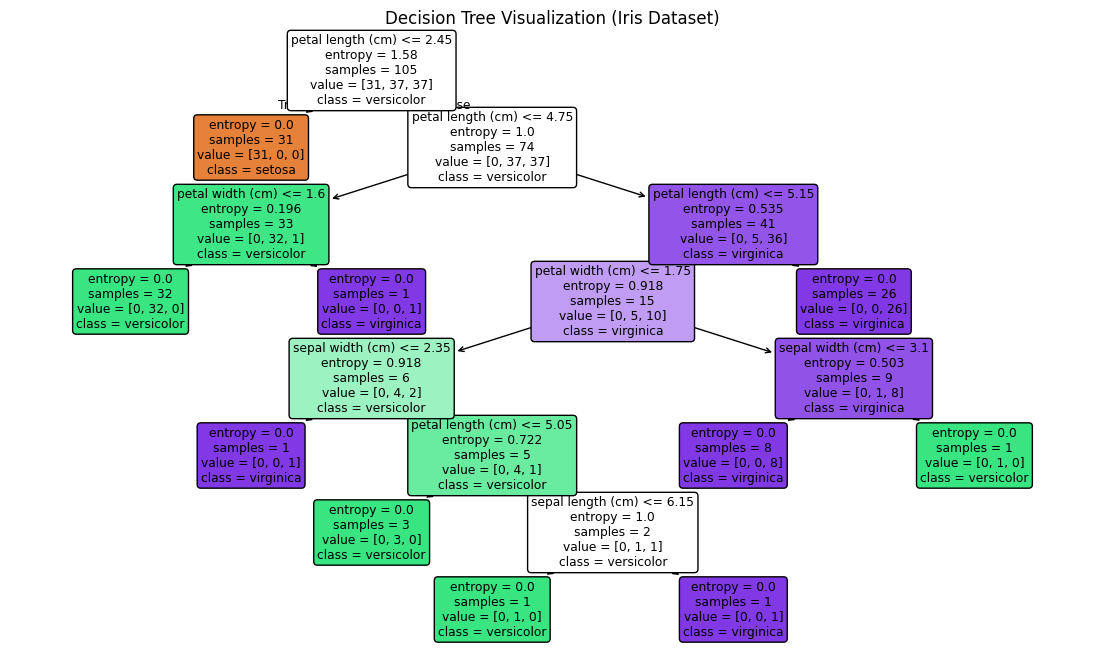

In [17]:
# 📘 Decision Tree Classifier Example

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("Dataset Sample:")
print(df.head())

# -----------------------------
# Step 2: Split Data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Train Decision Tree Model
# -----------------------------
# criterion can be 'gini' or 'entropy'
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# -----------------------------
# Step 4: Make Predictions
# -----------------------------
y_pred = clf.predict(X_test)

# -----------------------------
# Step 5: Evaluate Model
# -----------------------------
print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# -----------------------------
# Step 6: Visualize Decision Tree
# -----------------------------
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()


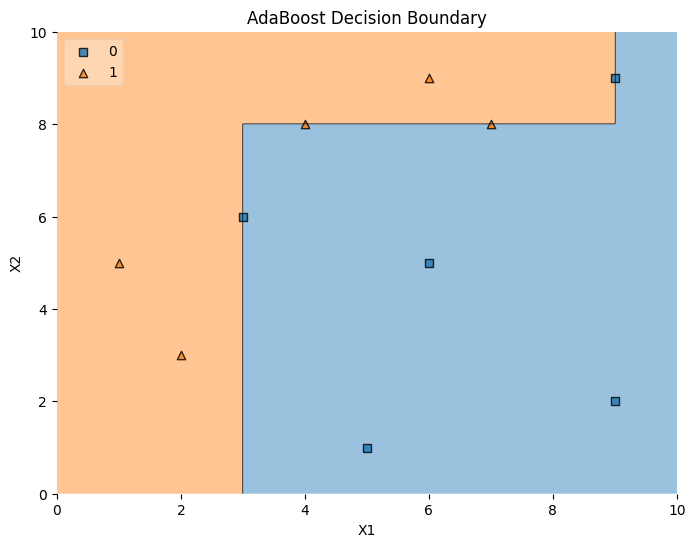

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Step 1: Create dataset
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

# Step 2: Prepare features and labels
X = df[['X1', 'X2']].values
y = df['label'].values

# Step 3: Initialize base (weak) learner
base_clf = DecisionTreeClassifier(max_depth=1)

# Step 4: Create AdaBoost classifier
ada = AdaBoostClassifier(estimator=base_clf, n_estimators=10, learning_rate=1.0, random_state=1)

# Step 5: Train AdaBoost
ada.fit(X, y)

# Step 6: Plot decision regions
plt.figure(figsize=(8,6))
plot_decision_regions(X, y, clf=ada, legend=2)
plt.title('AdaBoost Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

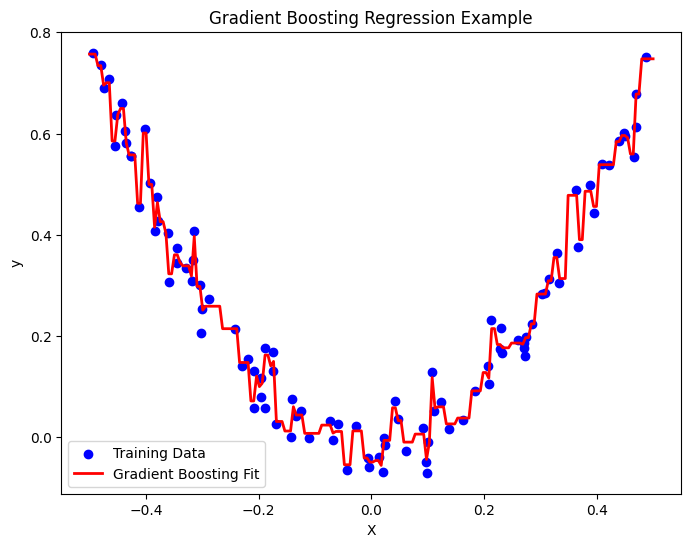

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Step 1: Generate dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5   # Random X values in [-0.5, 0.5]
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)  # Parabolic relation with noise

# Convert to DataFrame (optional, for easy viewing)
df = pd.DataFrame({'X': X[:, 0], 'y': y})

# Step 2: Create Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=200,   # number of boosting stages
    learning_rate=0.1,  # step size shrinkage
    max_depth=3,        # tree depth (controls model complexity)
    random_state=42
)

# Step 3: Train model
model.fit(X, y)

# Step 4: Predict on a smooth range of X for curve plotting
X_test = np.linspace(-0.5, 0.5, 200).reshape(-1, 1)
y_pred = model.predict(X_test)

# Step 5: Plot results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Gradient Boosting Fit')
plt.title("Gradient Boosting Regression Example")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


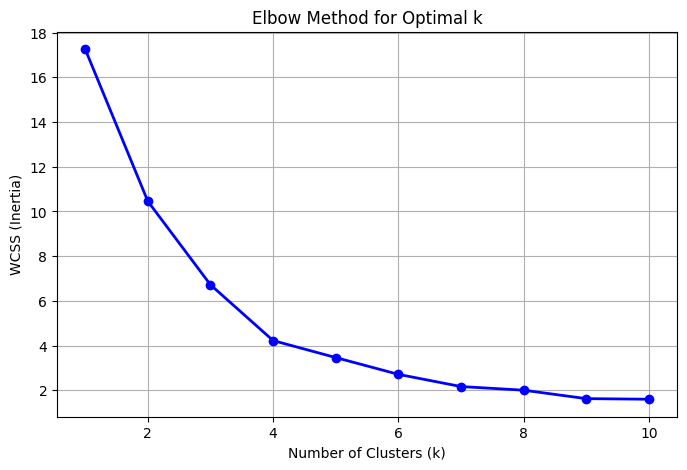

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create or load a dataset
X = np.random.rand(100, 2)  # 100 points in 2D space

# Step 2: Compute WCSS (Within-Cluster Sum of Squares) for different k values
wcss = []
K_values = range(1, 11)  # test k from 1 to 10

for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_values, wcss, 'bo-', linewidth=2)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


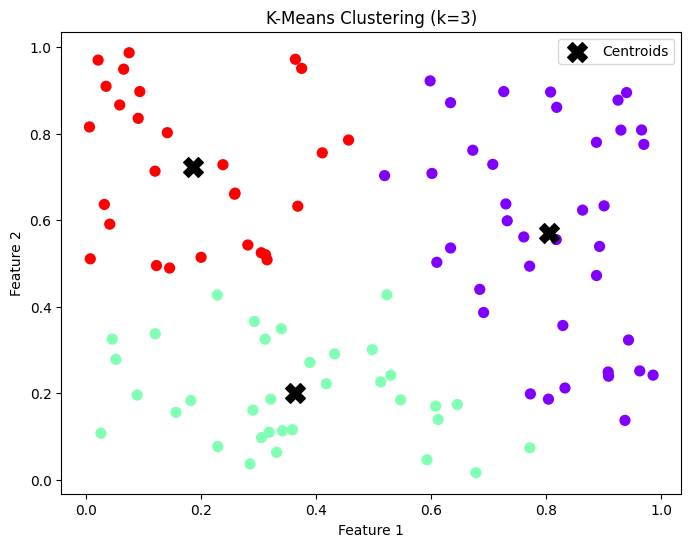

In [23]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create sample data (2D points)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points with 2 features

# Step 2: Choose number of clusters (k)
k = 3

# Step 3: Create and train the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

# Step 4: Get cluster predictions and centroids
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Step 5: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


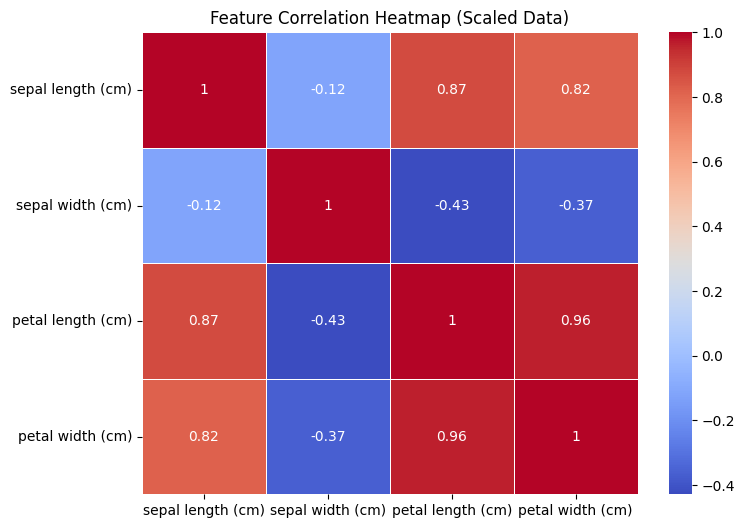

In [24]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Step 2: Scale data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Step 3: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Scaled Data)')
plt.show()
